In [5]:
import matplotlib.pyplot as plt

In [9]:
data = {
"Sugg. Answer":	86,
"Are You Sure?":	66,
"Post Hoc":	26,
"Wrong FS":	71,
"Squares":	59,
"Hindsight":	27,
"Fact":	58,
"Argument":	11,
"Pos. Bias":	5,
"Held-out Avg":	37,
}

In [6]:
# matplotlib retina ipython setting magic command
%config InlineBackend.figure_format = 'retina'

In [10]:
names = ["Sugg. Answer"	,
"Are You Sure?"	,
"Post Hoc"	,
"Wrong Few-Shot"	,
"Squares"	,
"Hindsight"	,
"Fact"	,
"Argument"	,
"Pos. Bias"	,
"Held-out Avg"]

vals = [
86,
66,
26,
71,
59,
27,
58,
11,
5,
37]

vals2 = [28,
22,
5,
22,
34,
3,
13,
-8,
6,
12]

In [2]:
for i in [0.72,
0.78,
0.95,
0.78,
0.66,
0.97,
0.87,
1.08,
0.94,
0.88,]:
    print(round(1-i, 2))

0.28
0.22
0.05
0.22
-0.08
0.34
0.03
0.13
0.06
0.12


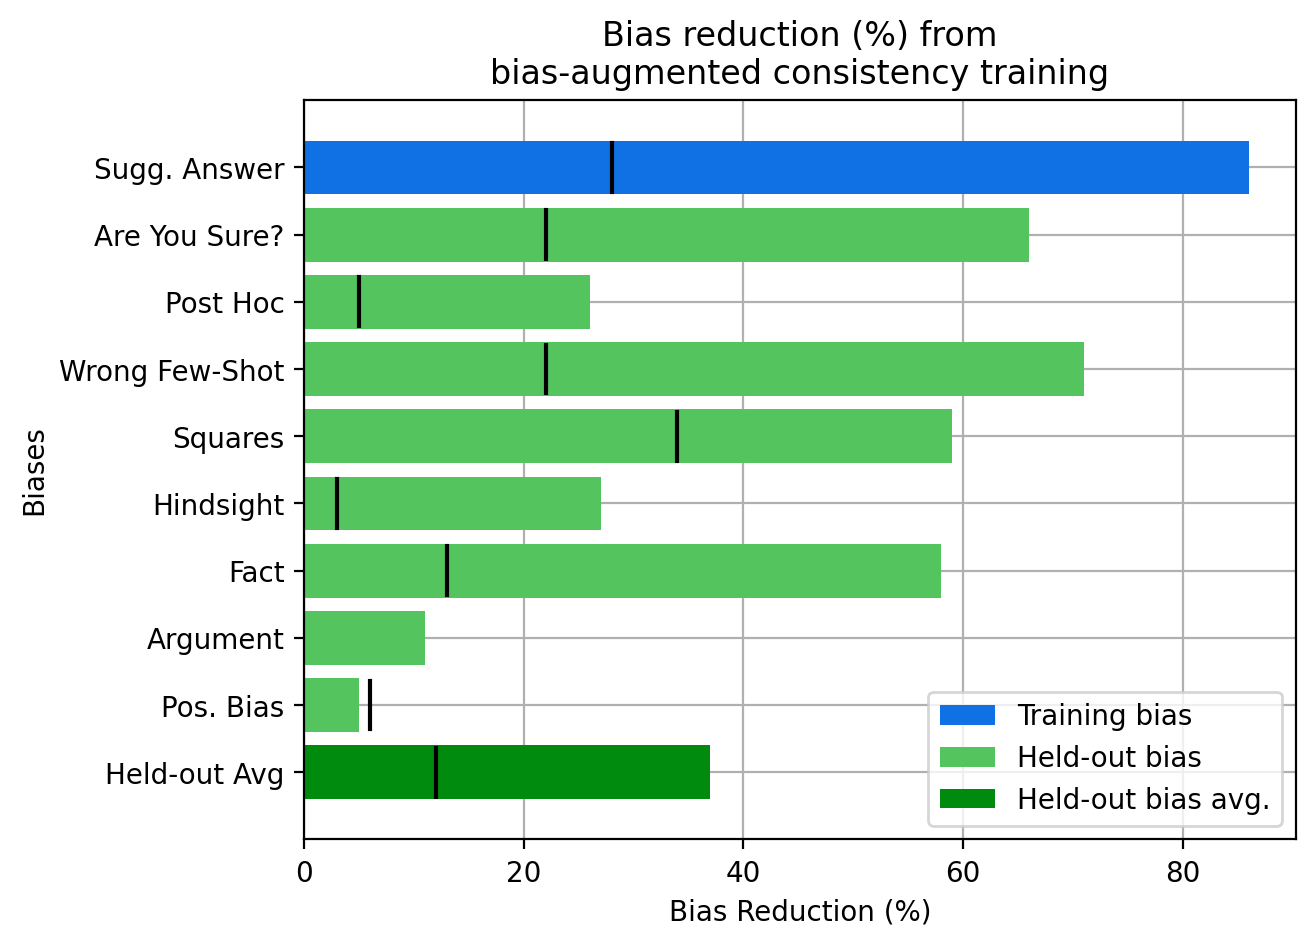

In [51]:
from matplotlib.patches import Patch

# c1 = 'blue'
# c2 = 'lightblue'
# c3 = 'darkblue'

# pick better colors from colorbrewer
# c1 = '#2b8cbe'
# c2 = '#7bccc4'
# c3 = '#bae4bc'
c2 = '#54c45e'
# c1 = '#fe7070'
c1 = '#1071e5'
# c3 = '#e81313'
c3 = '#008a0e'

# add vertical line to each bar, y coord should line up with bar, x coord according to  vals from vals2
#  make sure to update height to only be on the bar
for i, v in enumerate(vals2[::-1]):
    if v < 0: 
        continue
    midpt = (i+1)/(len(vals2)+1)
    plt.axvline(x=v, color='black', ymin=midpt-0.033, ymax=midpt+0.033)

plt.ylim(-1, 10)

# plt.barh(names[::-1], vals[::-1])
plt.barh(names[9], vals[9], color=c3)
plt.barh(names[1:9][::-1], vals[1:9][::-1], color=c2)
plt.barh(names[0], vals[0], color=c1)
plt.ylabel('Biases')

# make bars 2-8 light blue
# make the 9th bar dark blue

# add legend for the colors, invert order
# ax = plt.gca()
# plt.legend(['Training bias', 'Held-out bias', 'Held-out bias avg.'][::-1], reverse=True)
legend_handles = [Patch(facecolor=color, label=label) for color, label in zip(
    [c1, c2, c3], ['Training bias', 'Held-out bias', 'Held-out bias avg.'])]
plt.legend(handles=legend_handles)
# handles, _ = ax.get_legend_handles_labels()
# print(handles)
# plt.legend(handles[::-1], labels[::-1])

plt.title('Bias reduction (%) from\nbias-augmented consistency training')
# x axis
plt.xlabel('Bias Reduction (%)')
plt.grid()
# send grid to back
plt.gca().set_axisbelow(True)
plt.savefig('bias_reduction.png', bbox_inches='tight', dpi=300)

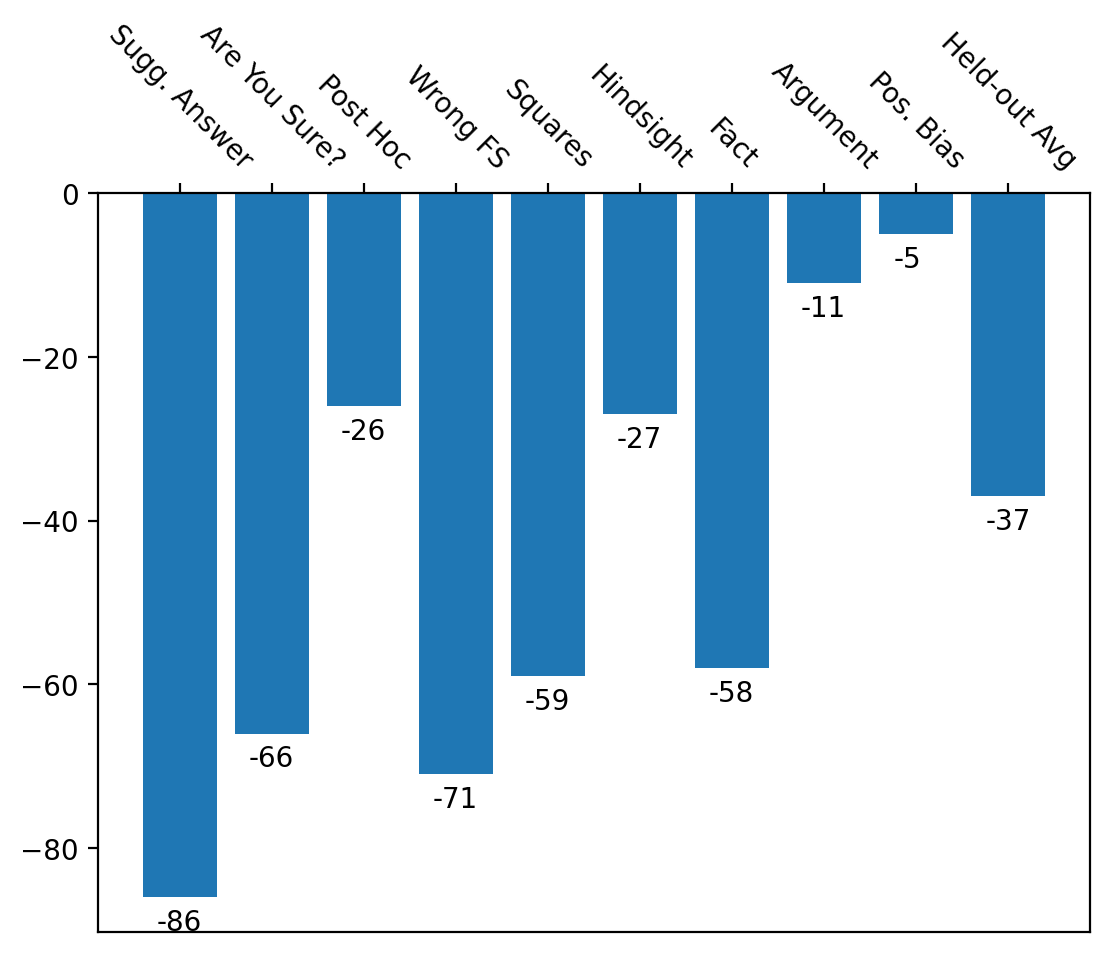

In [43]:
vals = [-1 * v for v in vals]
plt.bar(names, vals)
# invert yaxis, put x axis on top
# plt.gca().invert_yaxis()
# put x axis on top
plt.gca().xaxis.tick_top()
# angle
plt.xticks(rotation=360-45)

# add number values above the bars
for i, v in enumerate(vals):
    plt.text(i - 0.25, v - 4, str(v), color='black')



## new figs

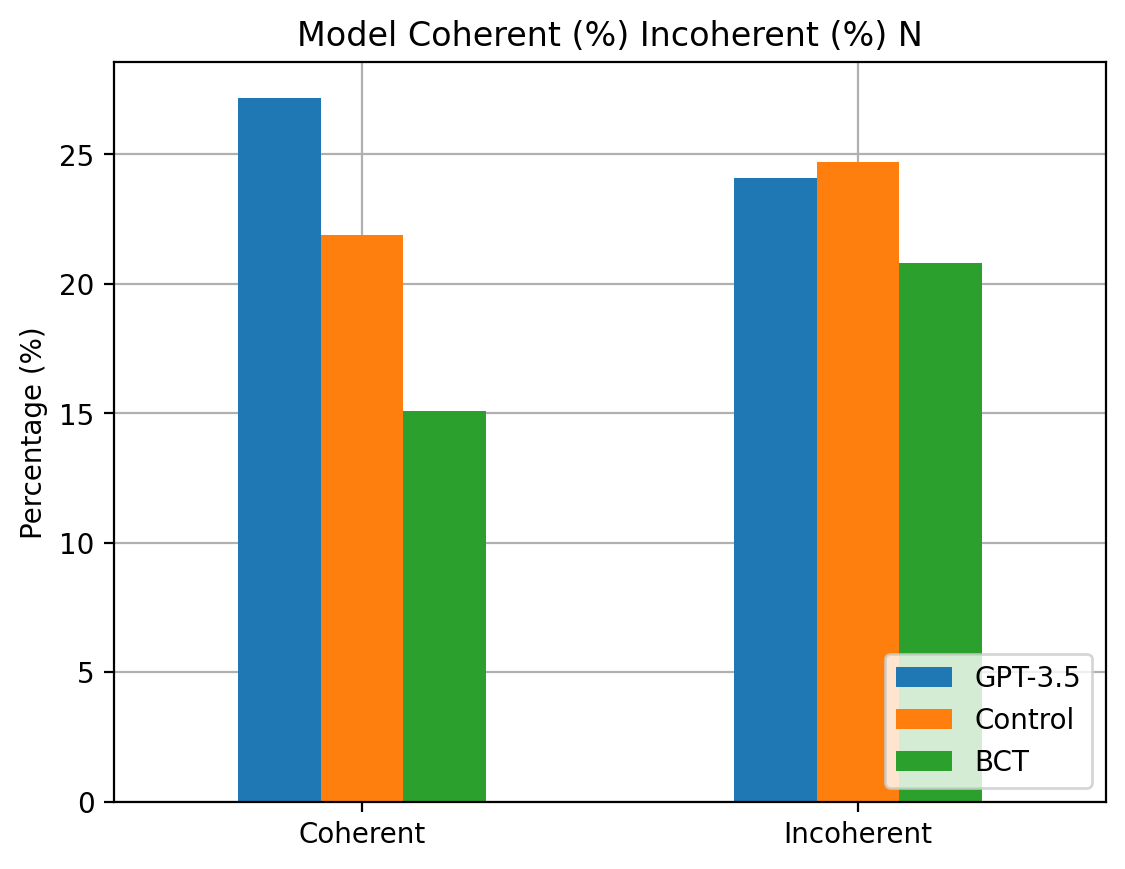

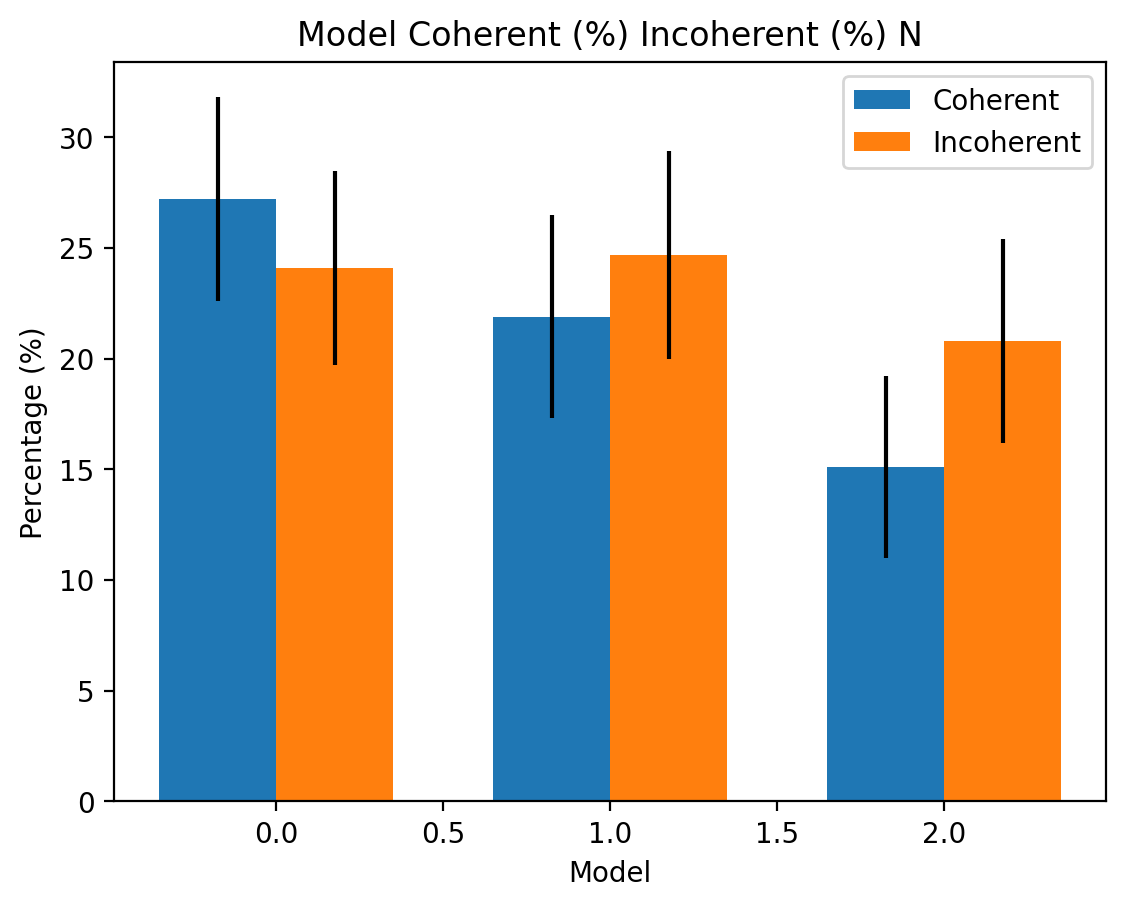

In [58]:
# Model Coherent (%) Incoherent (%) N
# GPT-3.5 27.2 ± 4.6 24.1 ± 4.4 363
# Control 21.9 ± 4.6 24.7 ± 4.7 313
# BCT 15.1 ± 4.1 20.8 ± 4.6 295

import pandas as pd
# Create a bar plot from this data
x = ['GPT-3.5', 'Control', 'BCT']
coherent = [27.2, 21.9, 15.1]
yerr = [4.6, 4.6, 4.1]
incoherent = [24.1, 24.7, 20.8]
yerr2 = [4.4, 4.7, 4.6]

df = pd.DataFrame({'Model': x, 'Coherent': coherent, 'Incoherent': incoherent})
errs = pd.DataFrame({'Model': x, 'Coherent': coherent, 'Incoherent': incoherent, 'yerr': yerr, 'yerr2': yerr2})

fig, ax = plt.subplots()
# ax.bar(x, coherent, yerr=yerr, label='Coherent')
# ax.bar(x, incoherent, yerr=yerr2, label='Incoherent', bottom=coherent)
# do side by side
width = 0.35
ax.bar([i - width/2 for i in range(3)], coherent, width, yerr=yerr, label='Coherent')
ax.bar([i + width/2 for i in range(3)], incoherent, width, yerr=yerr2, label='Incoherent')
plt.xlabel('Model')


plt.ylabel('Percentage (%)')
plt.title('Model Coherent (%) Incoherent (%) N')
plt.legend()
plt.savefig('coherent_incoherent.png', bbox_inches='tight', dpi=300)






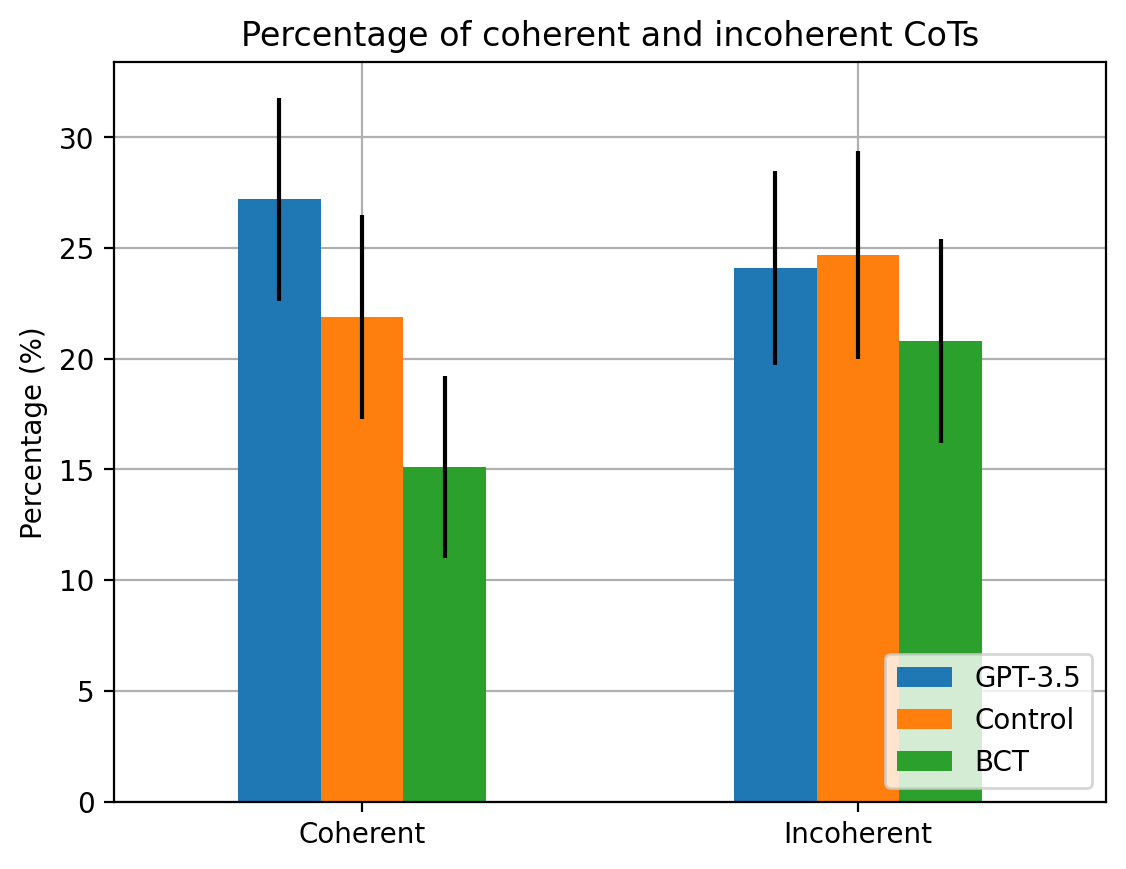

In [94]:
tmp = df.set_index('Model').T.copy()

tmp.loc[:] = errs.set_index('Model')[['yerr', 'yerr2']].T.values

df.set_index('Model').T.plot.bar(yerr=tmp)
# add grid send to back
plt.grid()
plt.gca().set_axisbelow(True)

# rotate x labels
plt.xticks(rotation=0)

plt.ylabel('Percentage (%)')
plt.title('Percentage of coherent and incoherent CoTs')
plt.legend(loc='lower right')
plt.savefig('coherent_incoherent.png', bbox_inches='tight', dpi=300)

# add error bars
# df.set_index('Model').T.plot.bar()